# Stock Market Analysis

We'll consider the following questions:

1) What was the change in price of the stock over time?  
2) What was the moving average of the various stocks?  
3) What was the daily return of the stock on average?  
4) What was the correlation between different stocks?  
5) How can we predict stock closing price?

### 1. What was the change in price of the stock overtime?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For prediction
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For Augmented Dickey–Fuller test 
from statsmodels.tsa.stattools import adfuller

In [2]:
# The stocks we'll use for this analysis
stock_list = ['AMZN', 'EBAY', 'NFLX', 'TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AMZN, EBAY, NFLX, TSLA]
company_name = ["AMAZON", "EBAY", "NETFLIX", "TESLA"]

for company, comp_name in zip(company_list, company_name):
    company["company_name"] = comp_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2017-12-13,1170.869995,1160.270020,1170.000000,1164.130005,2616800.0,1164.130005,AMAZON
2017-12-14,1177.930054,1162.449951,1163.709961,1174.260010,3214300.0,1174.260010,AMAZON
2017-12-15,1182.750000,1169.329956,1179.030029,1179.140015,4778600.0,1179.140015,AMAZON
2017-12-18,1194.780029,1180.910034,1187.369995,1190.579956,2947600.0,1190.579956,AMAZON
2017-12-19,1192.969971,1179.140015,1189.150024,1187.380005,2587800.0,1187.380005,AMAZON
2017-12-20,1191.000000,1176.000000,1190.500000,1177.619995,2371200.0,1177.619995,AMAZON
2017-12-21,1179.170044,1167.640015,1175.900024,1174.760010,2123100.0,1174.760010,AMAZON
2017-12-22,1174.619995,1167.829956,1172.079956,1168.359985,1585100.0,1168.359985,AMAZON
2017-12-26,1178.319946,1160.550049,1168.359985,1176.760010,2005200.0,1176.760010,AMAZON


We'll consider Amazon DataFrame more closely:

In [4]:
# Summary Statistics
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,2027.729535,1979.416941,2005.234451,2004.524410,4.798786e+06,2004.524410
std,570.165013,551.105767,561.906943,560.217755,2.215562e+06,560.217755
min,1170.869995,1160.270020,1163.709961,1164.130005,8.813000e+05,1164.130005
25%,1686.854980,1641.450012,1669.750000,1665.400024,3.166800e+06,1665.400024
50%,1838.579956,1805.339966,1822.000000,1820.859985,4.279500e+06,1820.859985
75%,2042.190002,2003.734985,2026.020020,2015.195007,5.783600e+06,2015.195007
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951


In [5]:
# General info
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2017-12-13 to 2020-12-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          755 non-null    float64
 1   Low           755 non-null    float64
 2   Open          755 non-null    float64
 3   Close         755 non-null    float64
 4   Volume        755 non-null    int64  
 5   Adj Close     755 non-null    float64
 6   company_name  755 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB


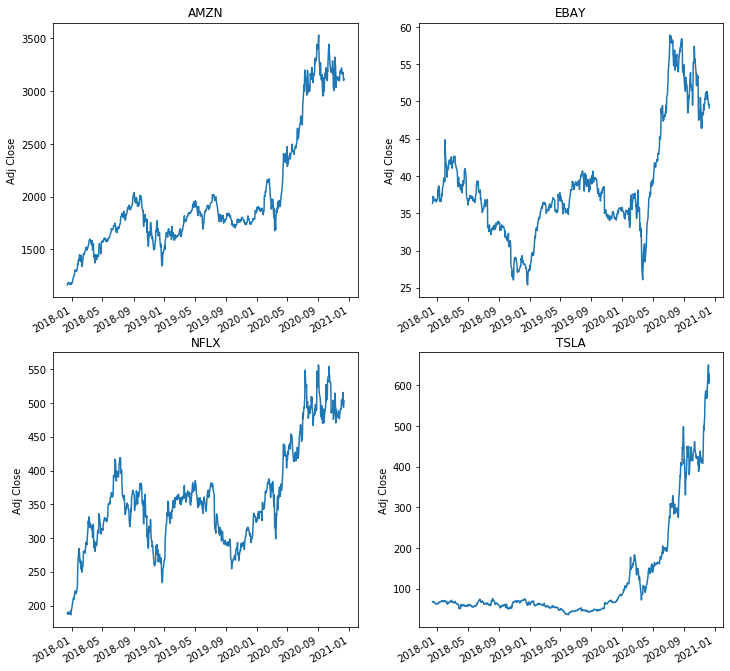

In [6]:
# Let's see a historical closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{stock_list[i - 1]}")

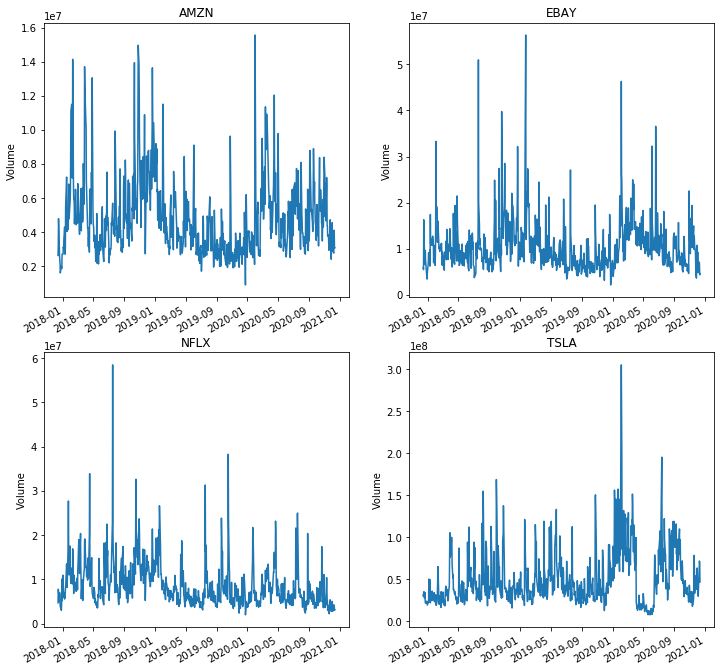

In [7]:
# Let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{stock_list[i - 1]}")

### 2. What was the moving average of the various stocks?

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

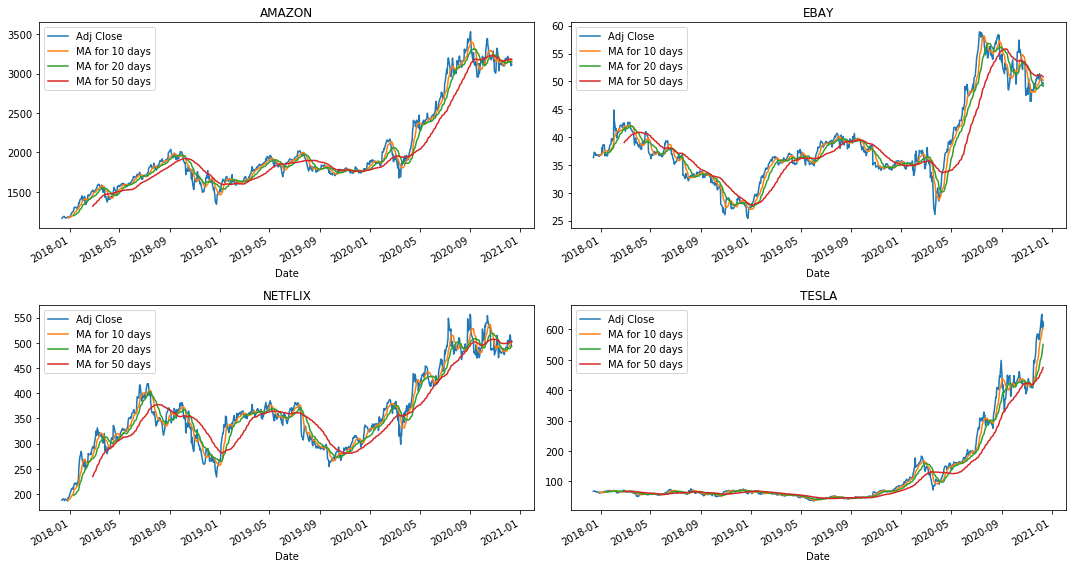

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

EBAY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('EBAY')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NETFLIX')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()


### 3. What was the daily return of the stock on average?

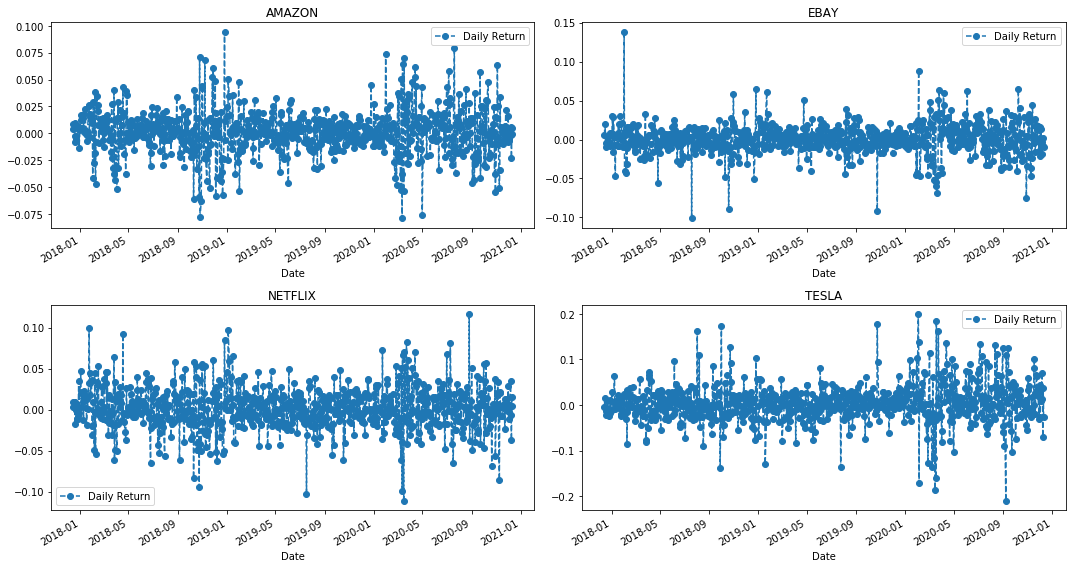

In [10]:
# We'll find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot the daily return
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

EBAY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('EBAY')

NFLX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NETFLIX')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

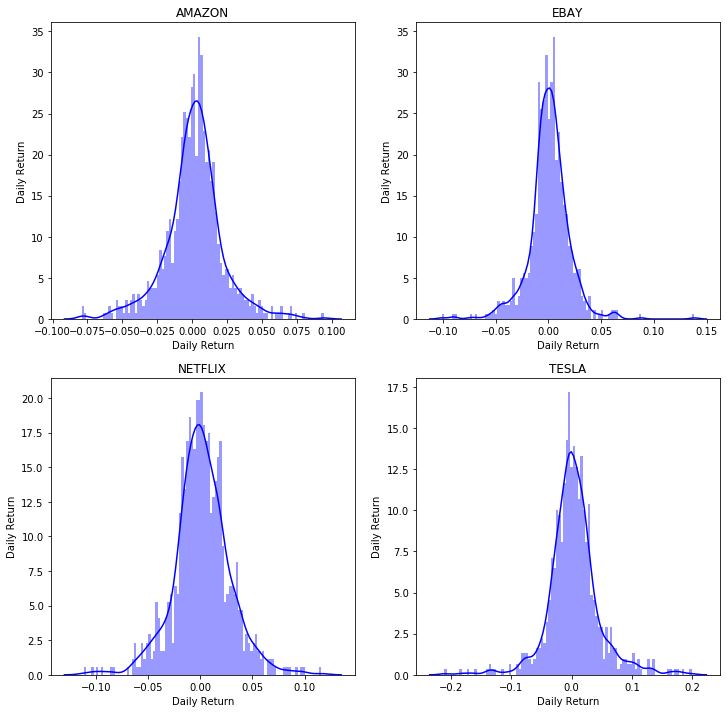

In [11]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

### 4. What was the correlation between different stocks closing prices?

In [12]:
# Join all the closing prices for the stocks into one DataFrame
df_closing = DataReader(stock_list, 'yahoo', start, end)['Adj Close']

df_closing.head() 

Symbols,AMZN,EBAY,NFLX,TSLA
Date,,,,
2017-12-13,1164.130005,36.321331,187.860001,67.806000
2017-12-14,1174.260010,36.515556,189.559998,67.578003
2017-12-15,1179.140015,37.263351,190.119995,68.690002
2017-12-18,1190.579956,37.078827,190.419998,67.774002
2017-12-19,1187.380005,36.709785,187.020004,66.220001


In [13]:
# Create a new DataFrame of daily returns
df_returns = df_closing.pct_change()
df_returns.head()

Symbols,AMZN,EBAY,NFLX,TSLA
Date,,,,
2017-12-13,NaN,NaN,NaN,NaN
2017-12-14,0.008702,0.005347,0.009049,-0.003362
2017-12-15,0.004156,0.020479,0.002954,0.016455
2017-12-18,0.009702,-0.004952,0.001578,-0.013335
2017-12-19,-0.002688,-0.009953,-0.017855,-0.022929


Now we can compare the daily percentage return of two stocks, check how they are correlated.

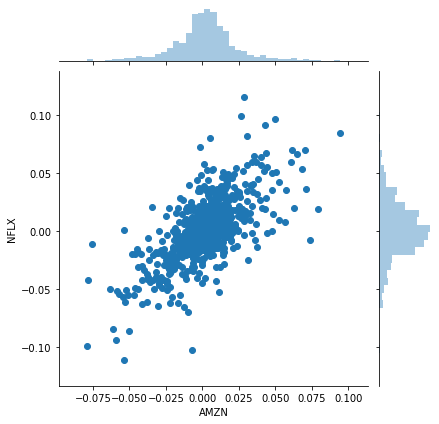

In [14]:
# We'll use joinplot to compare the daily returns of Amazon and Netflix
sns.jointplot('AMZN', 'NFLX', df_returns, kind='scatter')

We can see that this two stocks are positivley correlated with each other.

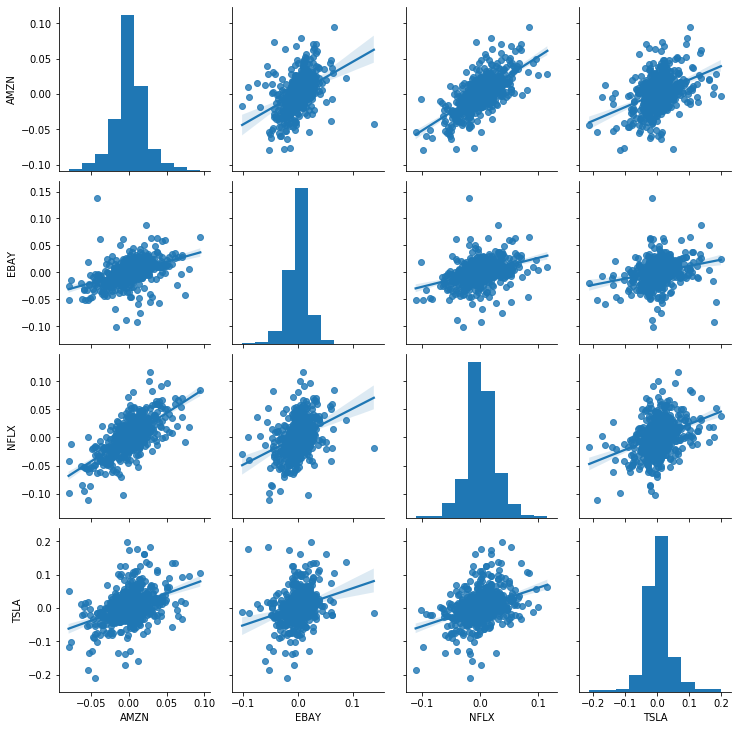

In [15]:
sns.pairplot(df_returns, kind='reg')

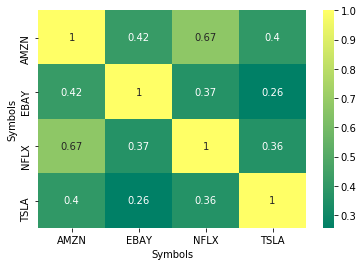

In [16]:
sns.heatmap(df_returns.corr(), annot=True, cmap='summer')

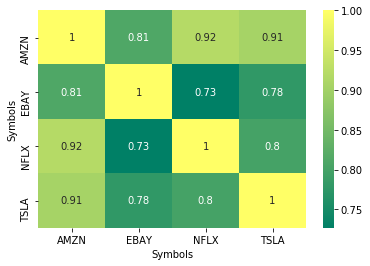

In [17]:
sns.heatmap(df_closing.corr(), annot=True, cmap='summer')

We see here numerically and visually that Amazon and Netflix have the strongest correlation of daily stock return. All the comapnies are positively correlated.

### 5. How can we predict stock closing price?

We'll consider Amazon stock price for the last year. 

In [18]:
#Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start=datetime(end.year - 1, end.month, end.day) , end=datetime.now())

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300,3158.000000
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300,3177.290039
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800,3104.199951
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200,3101.489990
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3062300,3116.419922


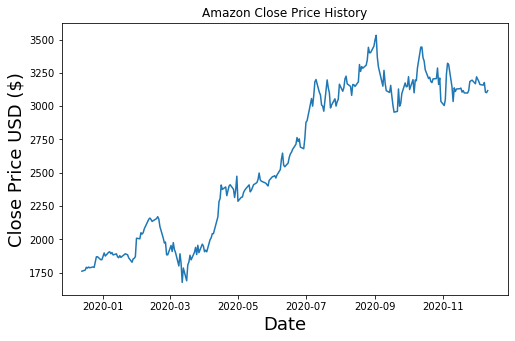

In [19]:
plt.figure(figsize=(8,5))
plt.title('Amazon Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
data.head(10)

,Close
Date,
2019-12-13,1760.939941
2019-12-16,1769.209961
2019-12-17,1790.660034
2019-12-18,1784.030029
2019-12-19,1792.280029
2019-12-20,1786.500000
2019-12-23,1793.000000
2019-12-24,1789.209961
2019-12-26,1868.770020


##### ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

The first step to build an ARIMA(p,d,q) model is to make the time series stationary. The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

p is the order of the "Auto Regressive" (AR) term. It refers to the number of lags of Y to be used as predictors.
d is the minimum number of differencing needed to make the series stationary.
q is the order of the "Moving Average" (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

How to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

We need differencing only if the series is non-stationary. Else, no differencing is needed, and d=0. To check if the series is stationary we use the Augmented Dickey Fuller (ADF) test.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

In [21]:
#Perform Augmented Dickey–Fuller test:
print('Results of Augmented Dickey-Fuller Test:')
adftest = adfuller(data.dropna())
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
    
print(adfoutput)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.221167
p-value                          0.664425
Number of Lags Used              3.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Since p-value is greater than the significance level (0.05), let’s difference the series and see how the autocorrelation plot looks like.

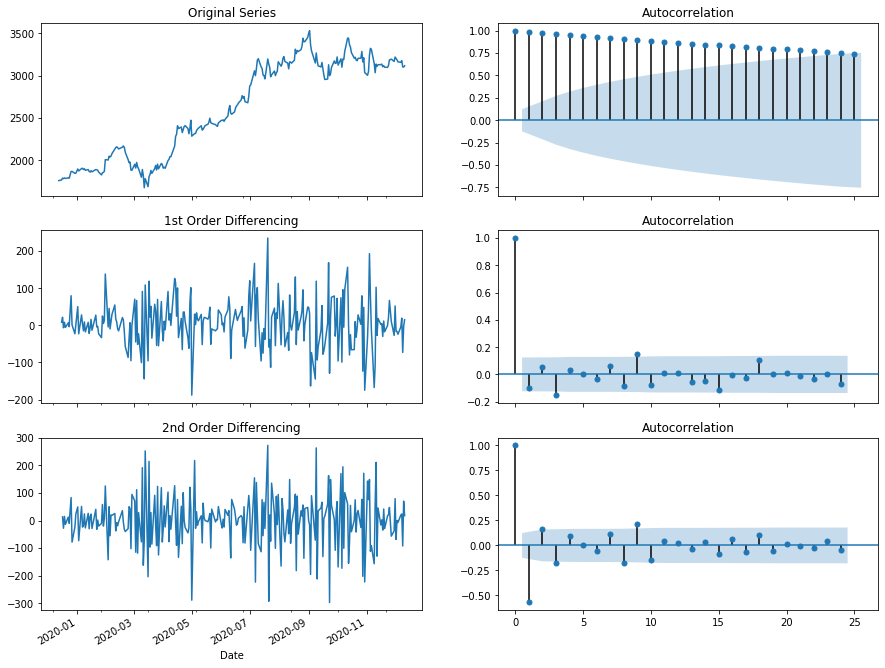

In [22]:
# Original Series
fig, axes = plt.subplots(nrows=3, ncols=2,sharex='col')
plt.subplots_adjust(hspace=0.2)
fig.set_figheight(12)
fig.set_figwidth(15)

data['Close'].plot(ax=axes[0,0])
axes[0,0].set_title('Original Series')
plot_acf(data['Close'], ax=axes[0, 1])

# 1st Differencing
data['Close'].diff().plot(ax=axes[1,0])
axes[1,0].set_title('1st Order Differencing')
plot_acf(data['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
data['Close'].diff().diff().plot(ax=axes[2,0])
axes[2,0].set_title('2nd Order Differencing')
plot_acf(data['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

fig.tight_layout()

For the above series, the time series reaches stationarity with one order of differencing.
So d=1.

We can find out the required number of AR terms p by inspecting the Partial Autocorrelation (PACF) plot. 

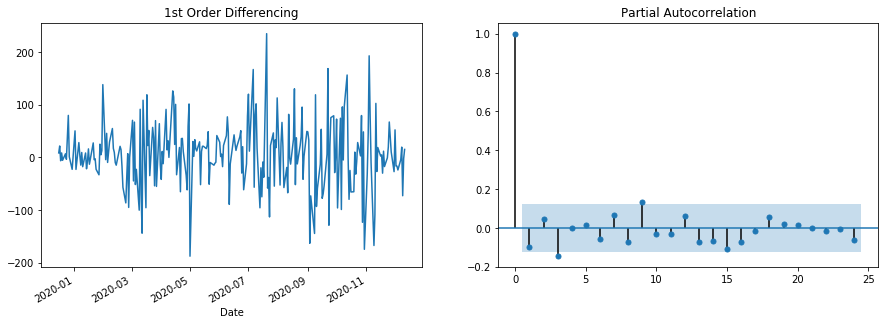

In [23]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(nrows=1, ncols=2, sharex='col')
fig.set_figheight(5)
fig.set_figwidth(15)

data['Close'].diff().plot(ax=axes[0], title='1st Order Differencing')
plot_pacf(data['Close'].diff().dropna(), ax=axes[1])

plt.show()

From the plot above we conclude that p=1.

The Autocorrelation (ACF) plot tells how many MA terms are required to remove any autocorrelation in the stationarized series.

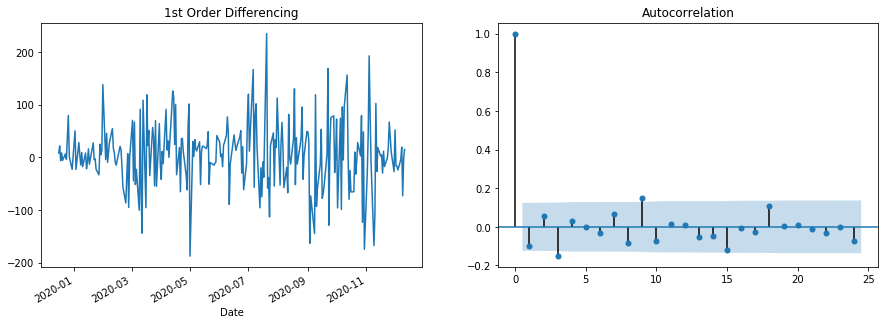

In [24]:
# ACF plot of 1st differenced series

fig, axes = plt.subplots(nrows=1, ncols=2, sharex='col')
fig.set_figheight(5)
fig.set_figwidth(15)

data['Close'].diff().plot(ax=axes[0], title='1st Order Differencing')
plot_acf(data['Close'].diff().dropna(), ax=axes[1])

plt.show()

From the plot above we conclude that q=1.

Let's use the ARIMA (1,1,1) model to predict the close price.

In [25]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA(1,1,1) Model
model = ARIMA(data['Close'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

D:\Maryna\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Maryna\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1393.517
Method:                       css-mle   S.D. of innovations             62.357
Date:                Sun, 13 Dec 2020   AIC                           2795.035
Time:                        00:21:12   BIC                           2809.137
Sample:                             1   HQIC                          2800.710
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4061      3.695      1.463      0.143      -1.836      12.648
ar.L1.D.Close    -0.6503      0.183     -3.555      0.000      -1.009      -0.292
ma.L1.D.Close     0.5490      0.197     

From the table we see that the p-values of the AR1 and MA1 terms are highly significant (<< 0.05).
Let’s plot the residuals to ensure there are no patterns.

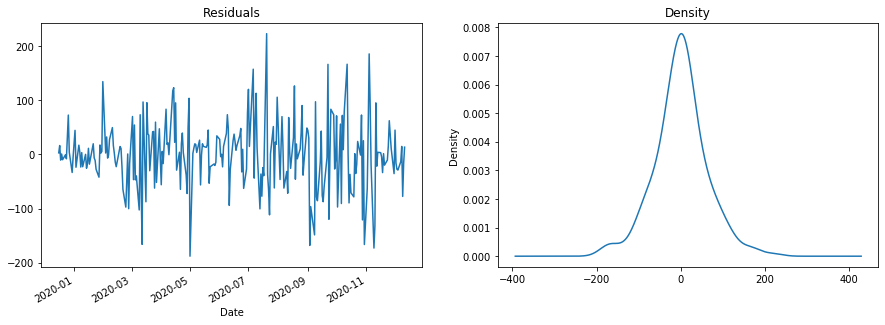

In [26]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(15)
residuals.plot(title="Residuals", ax=ax[0], legend=None)
residuals.plot(kind='kde', title='Density', ax=ax[1], legend=None)
plt.show()

The residual errors are with almost zero mean and uniform variance.
Now we can plot the actual values against the fitted values.

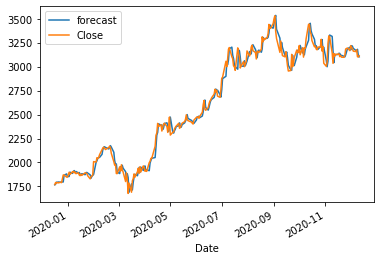

In [27]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

To see how well our model works we need to create the training and testing datasets by splitting the time series into 2 parts in approximately 80:20 ratio.

In [28]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

D:\Maryna\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Maryna\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


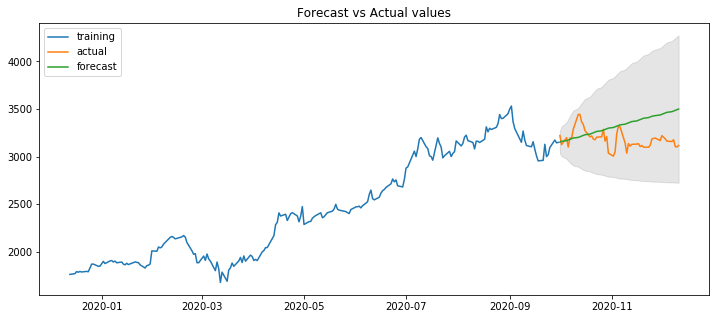

In [29]:
# Build ARIMA Model on training dataset
model = ARIMA(train_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
steps=int(len(data))-int(len(data)*0.8)
forecast, stderr, confint = fitted.forecast(steps, alpha=0.05)  # 95% CI

# Make as pandas series
forecast_series = pd.Series(forecast, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(forecast_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.1)
plt.title('Forecast vs Actual values')
plt.legend(loc='upper left', fontsize=10)
plt.show()

From the plot we see that the actual observed values lie within the 95% confidence band.
However, the predicted values from some point are constantly above the actual values. 

### Accuracy Metrics for Time Series Forecast

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Correlation between the Actual and the Forecast (corr)

If we compare forecasts of two different series the MAPE and Correlation can be used.

In [30]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

forecast_accuracy(forecast_series, test_data['Close'].values)

{'mape': 0.05797193016912766,
 'me': 143.446879525997,
 'mae': 182.76053910173886,
 'mpe': 0.046295080366952734,
 'rmse': 217.28832018373632,
 'corr': -0.4054008970554633}

ARIMA model was built based on:
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/